In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module
import time
from scipy.stats import linregress
import gmaps


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pinega
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | changqing
Processing Record 9 of Set 1 | yumen
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | adrar
Processing Record 14 of Set 1 | grande-riviere
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | scarborough
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | ama

In [7]:
len(city_data)

540

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pinega,64.70,43.39,32.04,95,89,9.82,RU,2020-10-17 00:24:54
1,Arraial Do Cabo,-22.97,-42.03,70.23,73,92,8.72,BR,2020-10-17 00:24:55
2,Punta Arenas,-53.15,-70.92,41.00,86,75,10.29,CL,2020-10-17 00:22:11
3,Ushuaia,-54.80,-68.30,42.80,85,40,25.28,AR,2020-10-17 00:24:55
4,Qaanaaq,77.48,-69.36,30.99,87,100,6.89,GL,2020-10-17 00:24:55
5,Avarua,-21.21,-159.78,78.80,61,28,10.29,CK,2020-10-17 00:24:55
6,Hermanus,-34.42,19.23,59.00,76,50,5.79,ZA,2020-10-17 00:24:55
7,Changqing,36.56,116.73,57.00,52,0,4.72,CN,2020-10-17 00:24:55
8,Yumen,40.28,97.20,42.78,50,62,11.61,CN,2020-10-17 00:24:55
9,Souillac,-20.52,57.52,68.00,94,20,5.82,MU,2020-10-17 00:24:56


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pinega,RU,2020-10-17 00:24:54,64.70,43.39,32.04,95,89,9.82
1,Arraial Do Cabo,BR,2020-10-17 00:24:55,-22.97,-42.03,70.23,73,92,8.72
2,Punta Arenas,CL,2020-10-17 00:22:11,-53.15,-70.92,41.00,86,75,10.29
3,Ushuaia,AR,2020-10-17 00:24:55,-54.80,-68.30,42.80,85,40,25.28
4,Qaanaaq,GL,2020-10-17 00:24:55,77.48,-69.36,30.99,87,100,6.89
...,...,...,...,...,...,...,...,...,...
535,Lokosovo,RU,2020-10-17 00:26:13,61.13,74.82,37.11,77,87,21.63
536,Puerto Baquerizo Moreno,EC,2020-10-17 00:26:13,-0.90,-89.60,70.09,86,97,11.88
537,Juuru,EE,2020-10-17 00:26:13,59.06,24.96,39.20,86,75,2.24
538,Rosetta,EG,2020-10-17 00:26:13,31.40,30.42,73.40,69,3,5.10


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

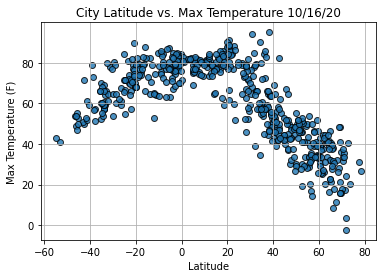

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

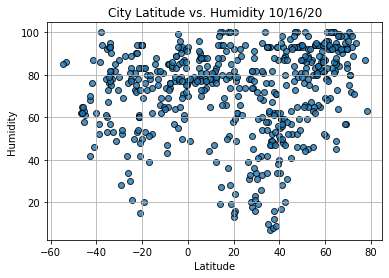

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

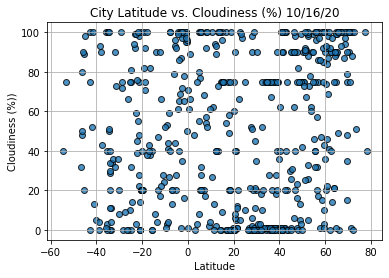

In [15]:
# Build the scatter plot for latitude vs. cloudiness %.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

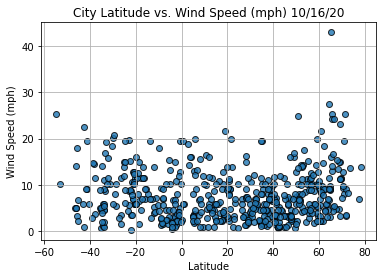

In [16]:
# Build the scatter plot for latitude vs. cloudiness %.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n" + "r-value " + str(round(r_value, 3))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    #plt.annotate(r_value, text_coordinates)
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2020-10-17 00:24:56
Lat                          42.6
Lng                        -73.97
Max Temp                       48
Humidity                       89
Cloudiness                    100
Wind Speed                   5.19
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
535     True
536    False
537     True
538     True
539     True
Name: Lat, Length: 540, dtype: bool

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

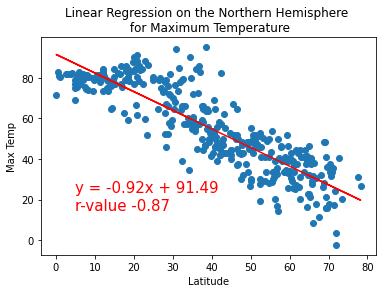

LinregressResult(slope=-0.916998390640201, intercept=91.49246173131903, rvalue=-0.8696350235098209, pvalue=7.445185126643554e-115, stderr=0.02713729307003129)


In [21]:
# Linear regression on the Northern Hemisphere max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,15))
print(linregress(x_values, y_values))

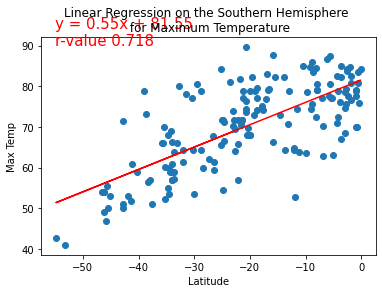

In [22]:
# linear regression on the southern Hemisphere max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values, 
                        'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

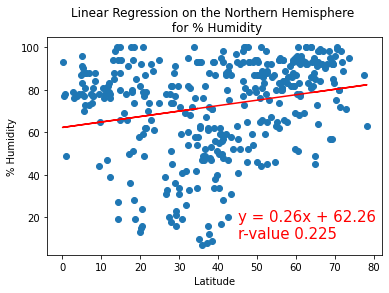

In [23]:
# linear regression on the northern hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity",(45, 10))

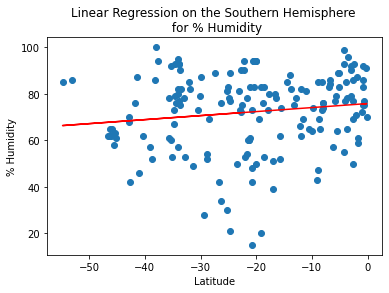

In [24]:
# linear regression on the southern hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity",(-55, 8))

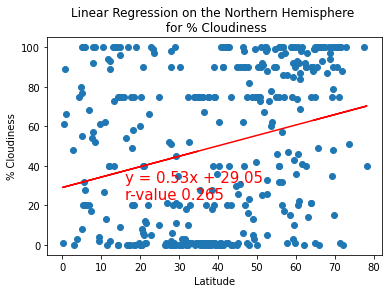

In [25]:
# linear regression on the northern hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness",(16, 23))

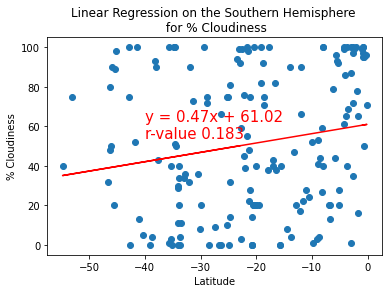

In [26]:
# linear regression on the southern hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness",(-40, 54))

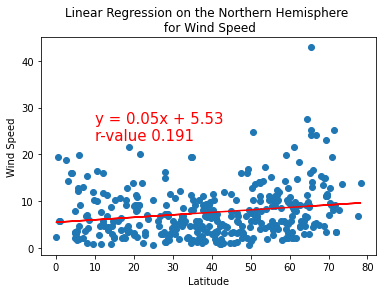

In [27]:
# linear regression on the northern hemisphere windspeed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed",(10, 23))

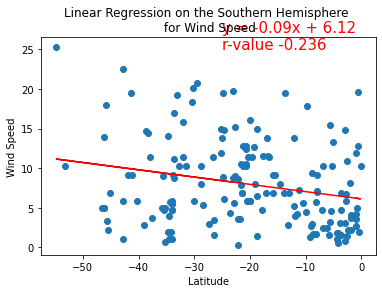

In [28]:
# linear regression on the southern hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed",(-25, 25))